In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("preprocessed_eeg_data.csv")

# Basic information
print(data.info())
print(data.describe())

# Class distribution
print(data['Label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965943 entries, 0 to 965942
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Fp1         965943 non-null  float64
 1   Fp2         965943 non-null  float64
 2   F3          965943 non-null  float64
 3   F4          965943 non-null  float64
 4   C3          965943 non-null  float64
 5   C4          965943 non-null  float64
 6   P3          965943 non-null  float64
 7   P4          965943 non-null  float64
 8   O1          965943 non-null  float64
 9   O2          965943 non-null  float64
 10  F7          965943 non-null  float64
 11  F8          965943 non-null  float64
 12  T3          965943 non-null  float64
 13  T4          965943 non-null  float64
 14  T5          965943 non-null  float64
 15  T6          965943 non-null  float64
 16  Fz          965943 non-null  float64
 17  Cz          965943 non-null  float64
 18  Pz          965943 non-null  float64
 19  La

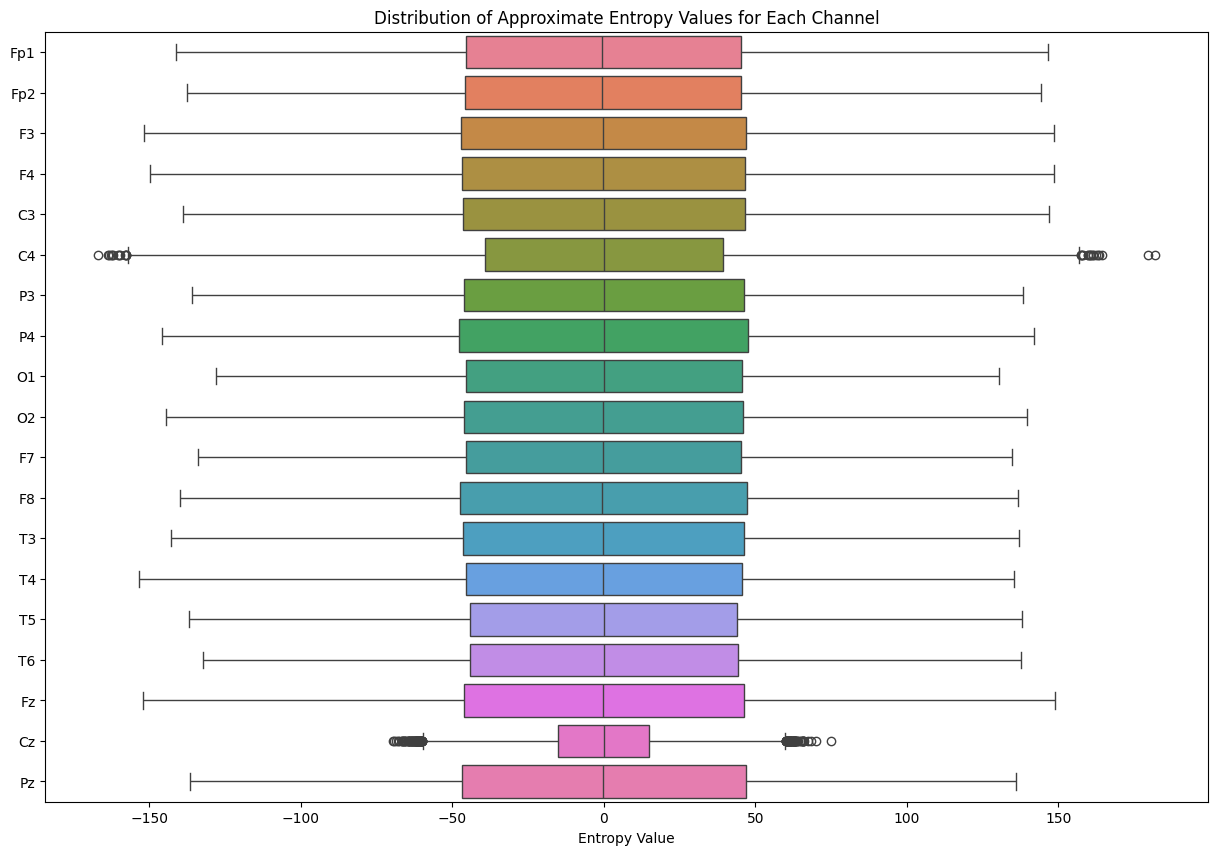

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(columns=['Patient_ID', 'Label']), orient="h")
plt.title("Distribution of Approximate Entropy Values for Each Channel")
plt.xlabel("Entropy Value")
plt.show()


C:\Users\smrit\AppData\Local\Temp\ipykernel_36688\2663896577.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data['Label'] == 1][channel], ax=axes[i // 4, i % 4], label='ADHD')
C:\Users\smrit\AppData\Local\Temp\ipykernel_36688\2663896577.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data['Label'] == 0][channel], ax=axes[i // 4, i % 4], label='Control')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


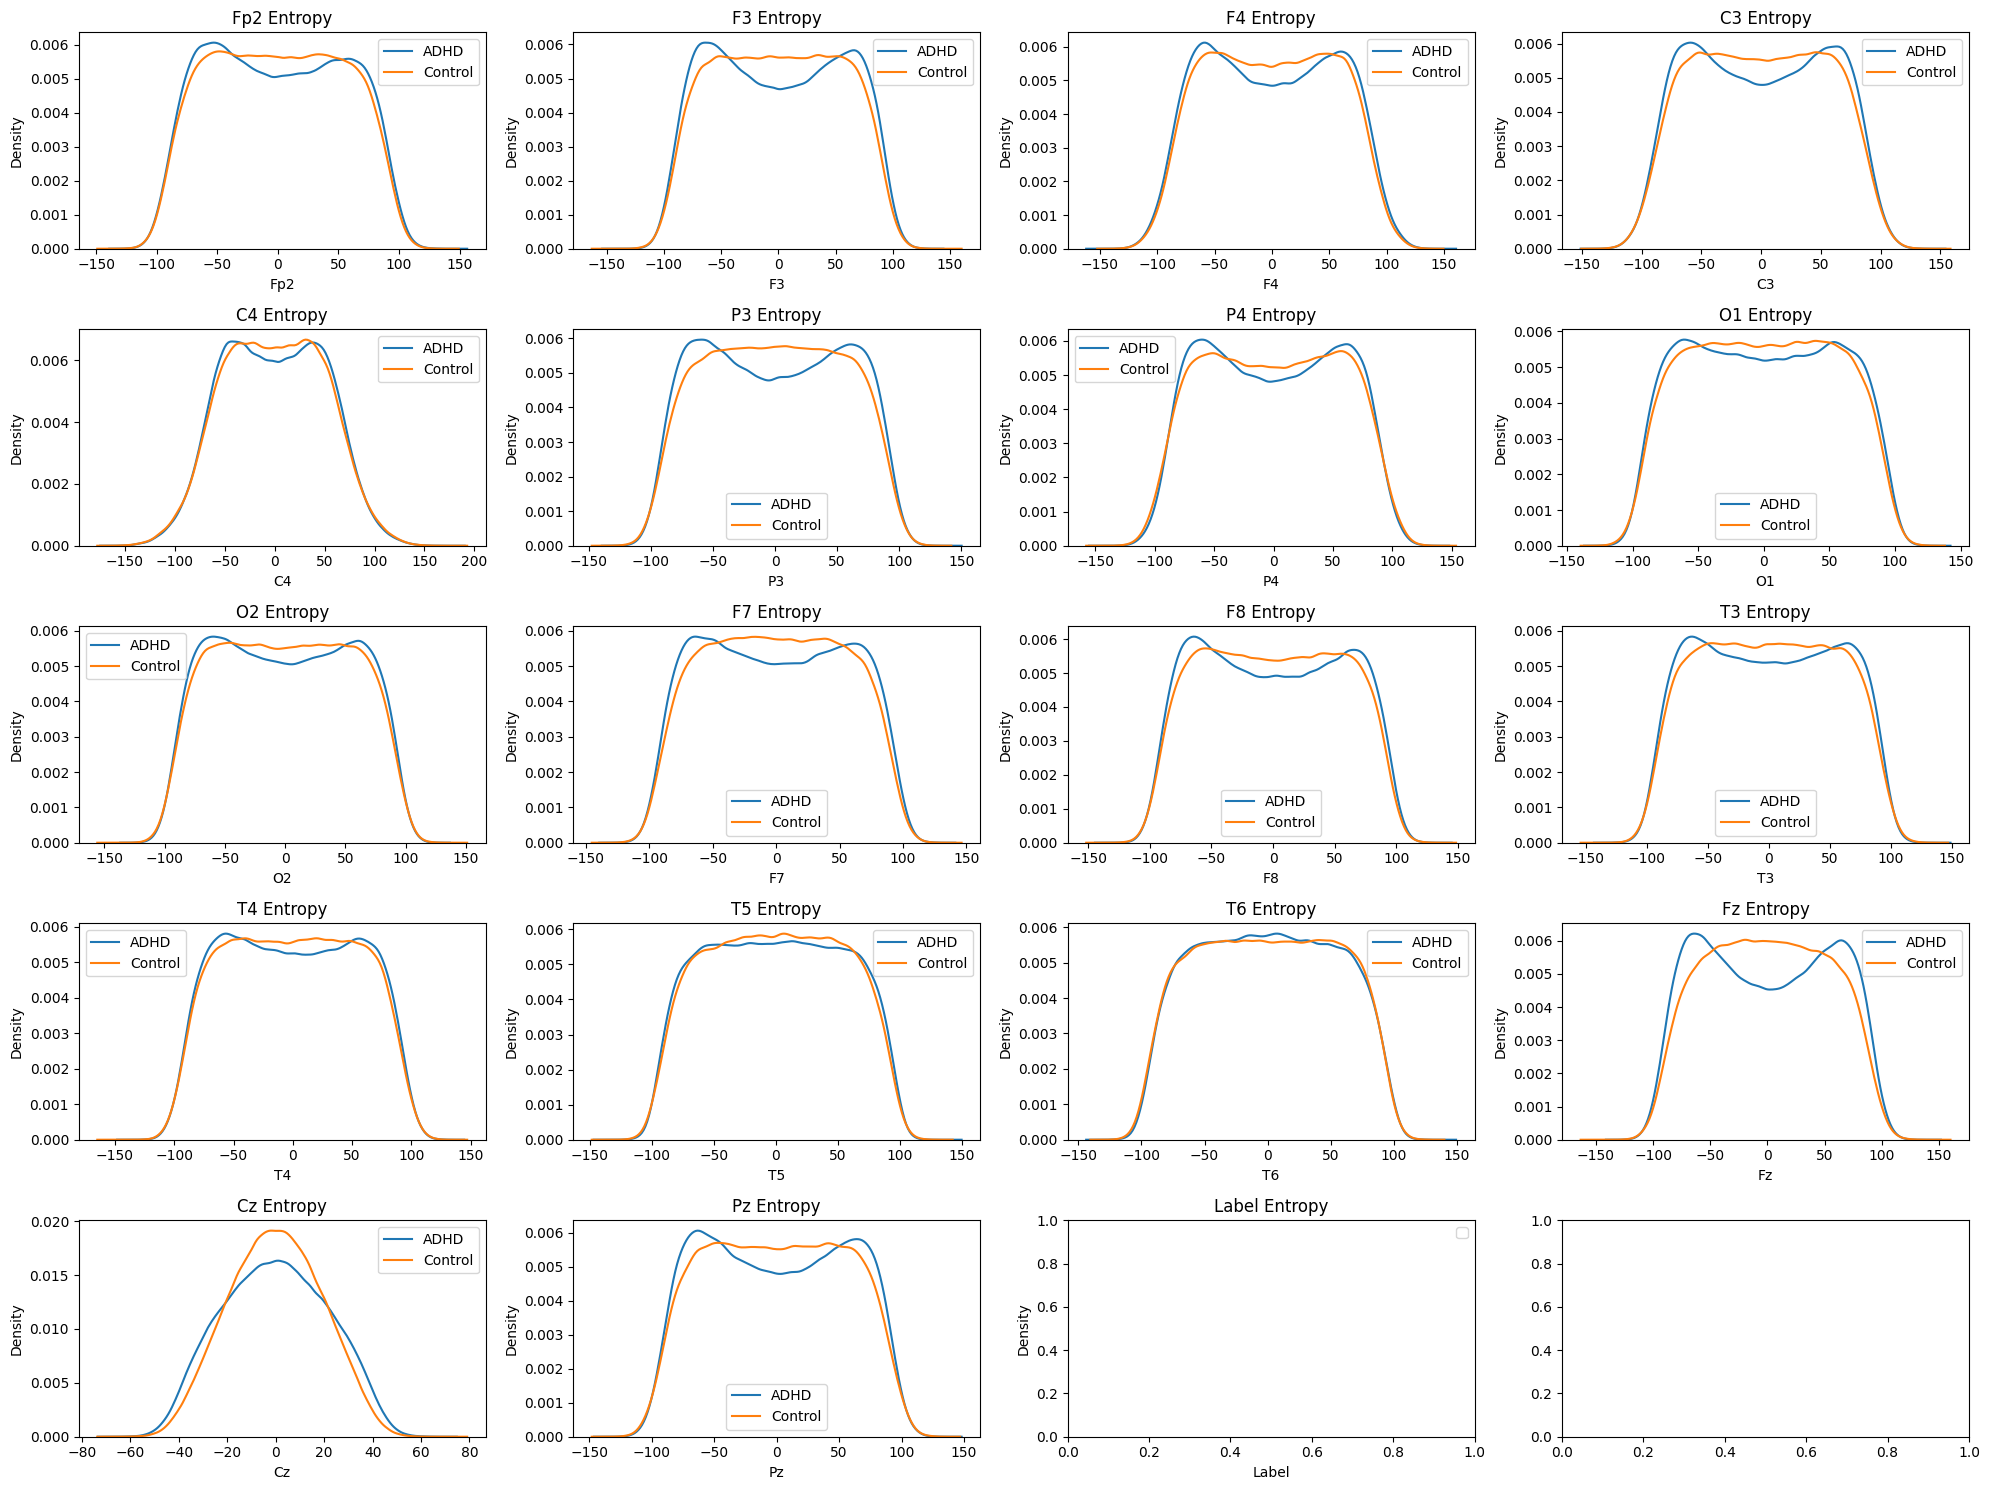

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
channels = data.columns[1:-1]  # Assuming columns 1 to -1 are channel entropy values
for i, channel in enumerate(channels):
    sns.kdeplot(data[data['Label'] == 1][channel], ax=axes[i // 4, i % 4], label='ADHD')
    sns.kdeplot(data[data['Label'] == 0][channel], ax=axes[i // 4, i % 4], label='Control')
    axes[i // 4, i % 4].set_title(f'{channel} Entropy')
    axes[i // 4, i % 4].legend()

plt.tight_layout()
plt.show()


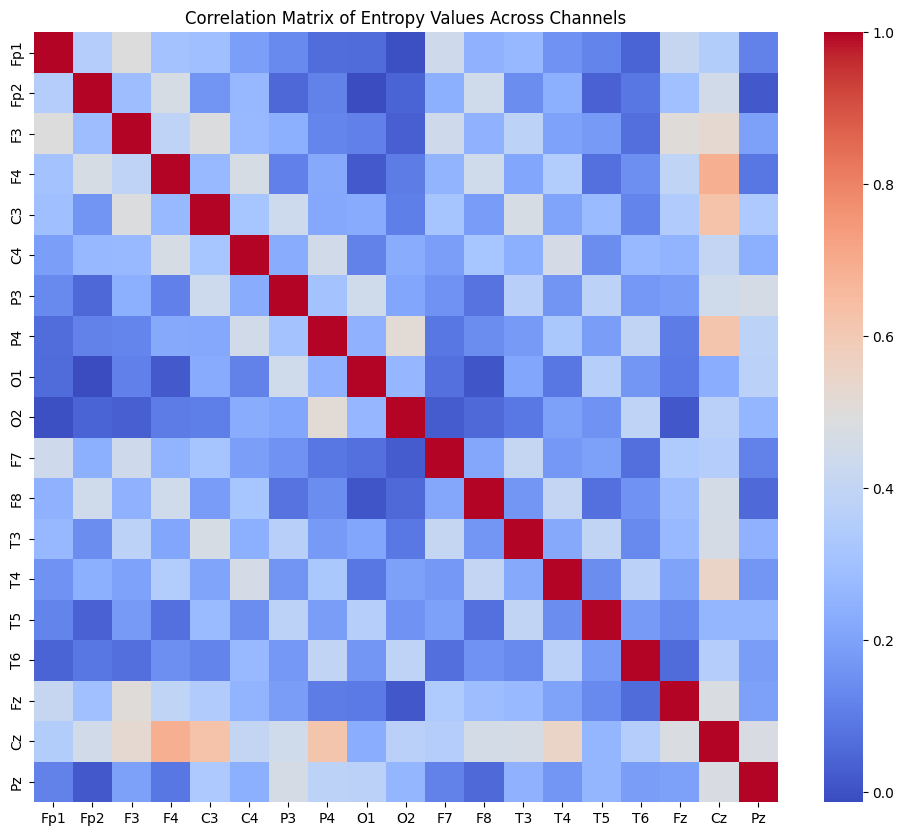

In [8]:
plt.figure(figsize=(12, 10))
corr_matrix = data.drop(columns=['Patient_ID', 'Label']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Entropy Values Across Channels")
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_entropy is your DataFrame with EEG channel columns and 'Label' as the last column
# Separate the label column
label_column = 'Label'  # Adjust if your label column name is different
channels = data.columns.drop(label_column)

# Calculate the mean entropy for ADHD and Control groups
mean_entropy = data.groupby(label_column)[channels].mean().T  # Transpose for easier plotting

# Plotting
plt.figure(figsize=(14, 8))
mean_entropy.plot(kind='bar', width=0.8, color=['#4B0082', '#FFD700'], edgecolor='black')
plt.title('Average Entropy per Channel for ADHD vs. Control')
plt.xlabel('EEG Channels')
plt.ylabel('Mean Entropy')
plt.xticks(rotation=45)
plt.legend(['Control', 'ADHD'], title='Label')
plt.tight_layout()
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

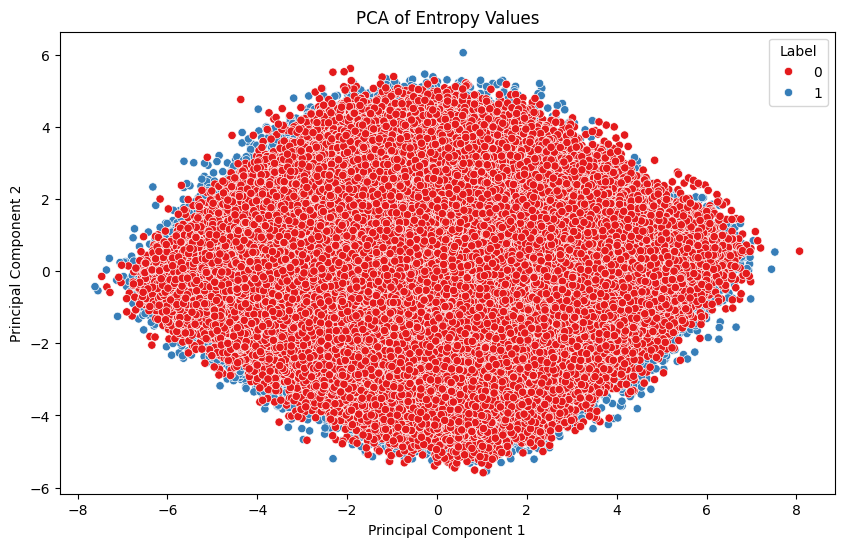

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Separate features and target
X = data.drop(columns=['Label','Patient_ID'])
y = data['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA of Entropy Values')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [6]:
data.head()

Fp1        Fp2         F3         F4         C3         C4         P3  \
0 -0.000027  -0.000056  -0.000066  -0.000117  -0.000103  -0.000282  -0.000054   
1  2.505235   7.988735 -23.155573  13.158681 -41.554782  19.788299 -45.323046   
2  5.202385  16.384989 -46.934837  27.432973 -80.473291  41.506415  13.996482   
3  5.342335  19.511770 -74.928989  29.924984 -66.207983  36.746148 -35.766868   
4  6.052312  23.632955 -58.987846  36.266236 -43.835454  37.646616 -47.394149   

          P4         O1         O2  ...         F8          T3         T4  \
0  -0.000095  -0.000012  -0.000042  ...  -0.000048   -0.000051  -0.000066   
1 -11.021028  23.793695  27.782912  ... -11.466725 -104.455994  -6.424960   
2 -21.867794  50.440562  -4.347586  ... -23.912986  -10.040215 -19.797432   
3 -21.443170  70.663297  -8.030366  ... -38.354829  -19.241083 -84.150907   
4 -18.914163 -10.572183  -4.621463  ... -55.296851  -62.029102 -44.070247   

           T5         T6         Fz         Cz         Pz  Label  \
0   -0.000018  -0.000035  -0.000058  -0.000575  -0.000065      1   
1 -103.123461 -36.700671 -12.189153 -10.646640   8.114466      1   
2  -22.937017 -73.182966 -25.069648 -16.936134  14.340312      1   
3  -58.017447 -73.308279 -41.299169 -23.842190  -2.022266      1   
4  -59.233797 -72.817302 -59.233398 -18.465677 -24.391653      1   

      Patient_ID  
0  v10p_v10p.csv  
1  v10p_v10p.csv  
2  v10p_v10p.csv  
3  v10p_v10p.csv  
4  v10p_v10p.csv  

[5 rows x 21 columns]